# Exercício de fixação de conceitos 2

## Objetivo

Regressão Logística Binária para o conjunto de dados de voz divido em gêneros masculino e feminino

## Importação de bibliotecas


In [3]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn.metrics as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

Leitura dos dados a partir de um txt:

In [2]:
dados = genfromtxt('dados_voz_genero.csv', delimiter=',')

In [3]:
dados = dados[1:,:] #remove cabeçalho
print(dados)

[[0.06424127 0.03202691 0.01507149 ... 0.         0.         1.        ]
 [0.06731003 0.04022874 0.01941387 ... 0.046875   0.05263158 1.        ]
 [0.08382942 0.03671846 0.00870106 ... 0.0078125  0.04651163 1.        ]
 ...
 [0.09579843 0.18373124 0.03342387 ... 2.9296875  0.19475862 0.        ]
 [0.09062826 0.18497617 0.0435081  ... 3.5859375  0.31100218 0.        ]
 [0.09288354 0.18304392 0.0700715  ... 0.546875   0.35       0.        ]]


In [4]:
# cria as matrizes X e y sendo 20% dos dados para teste e o restante para treino
X = dados[:,:-1] #remove a última coluna de 0 e 1's
y = dados[:,-1:] #seleciona somente a última coluna
y = y.ravel()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Normalização

In [5]:
Xtrain_norm = Xtrain
Xtest_norm = Xtest
nstd = 4
for i in range(0,len(Xtrain[0,:])):
    Xtrain_norm[:,i] = (Xtrain[:,i] - Xtrain[:,i].mean())/(nstd*Xtrain[:,i].std())
    Xtest_norm[:,i] = (Xtest[:,i] - Xtest[:,i].mean())/(nstd*Xtest[:,i].std())

In [6]:
Xtrain = Xtrain_norm

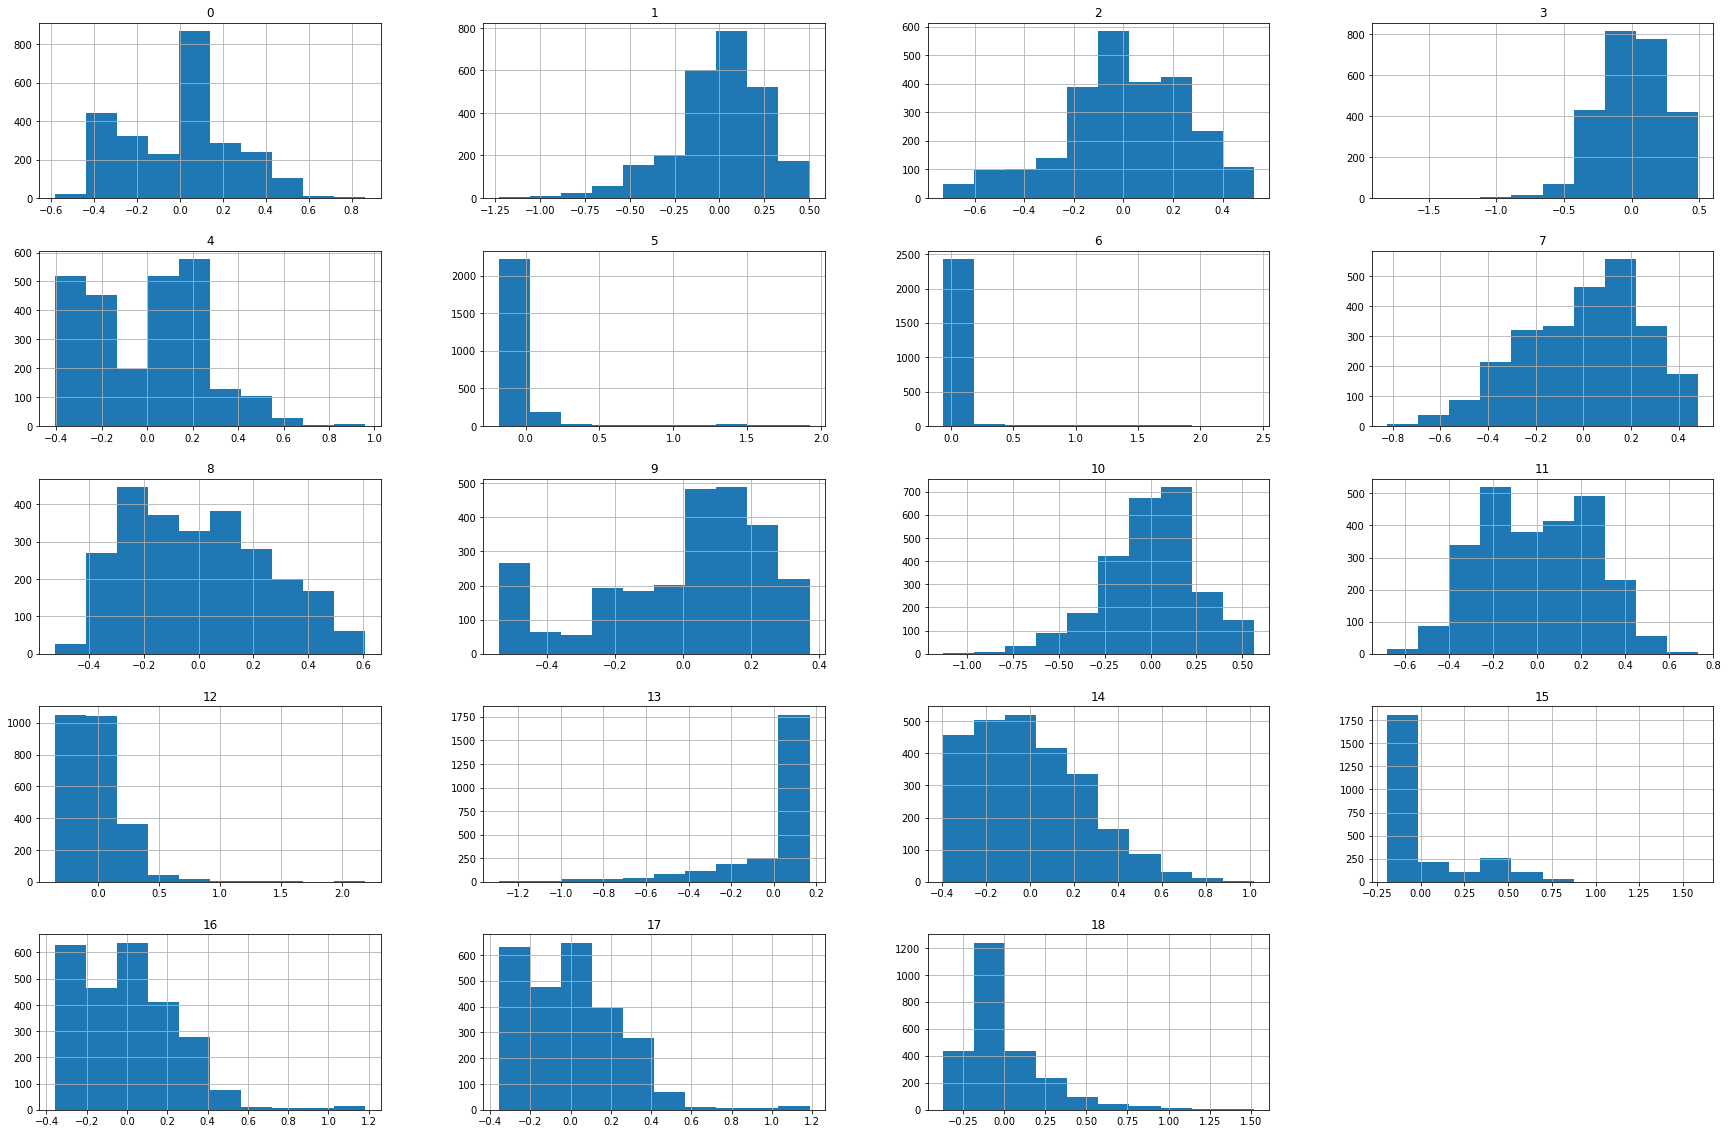

In [7]:
Xtrainpd = pd.DataFrame(Xtrain)
fig, ax = plt.subplots(figsize=(30,20)) 
Xtrainpd.hist(ax = ax)
pass

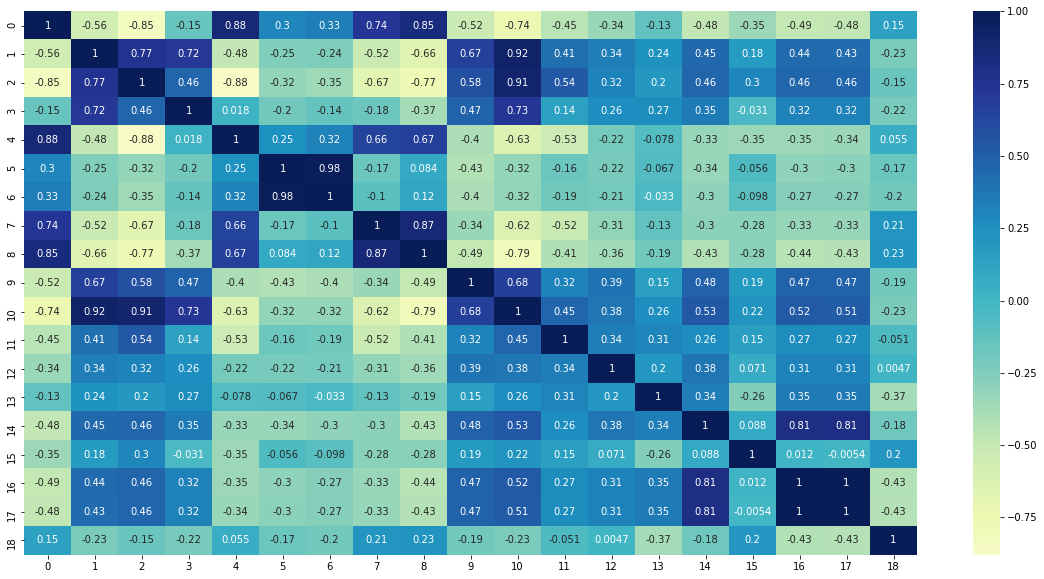

In [8]:
corrMatrix = Xtrainpd.corr()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, ax=ax,cmap="YlGnBu", center = 0)
plt.show()


In [9]:
Xtrainpd[6].sort_values()
Xtrainpd[6].quantile(q = 0.95)

0.07374892416917751

<AxesSubplot:>

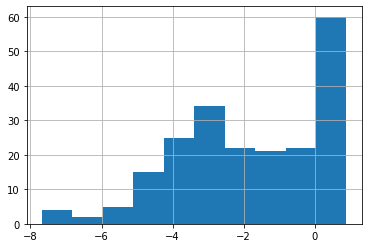

In [10]:
np.log(Xtrainpd[6]).hist()

As features 5 e 6 são muito assimétricas (skewness elevada), sendo assim seria interessante fazer algo no sentido de distribuir mais os valores no histograma.
No que se refere ao modo como os atributos estão correlacionados, observa-se que a 16 e 17 são quase colieares.

In [11]:
Xtrainpd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03,2.534000e+03
mean,-3.592671e-18,1.717472e-17,1.104089e-16,1.715720e-16,-1.016463e-17,-8.762613e-18,2.103027e-18,1.822623e-16,1.437068e-17,2.418481e-17,-1.314392e-17,-2.208178e-17,8.061604e-17,-2.870632e-16,6.834838e-17,-2.260754e-17,-1.699947e-17,3.785449e-17,1.121614e-17
std,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01,2.500493e-01
min,-5.828049e-01,-1.229153e+00,-7.272330e-01,-1.808009e+00,-4.060291e-01,-1.797936e-01,-6.349827e-02,-8.237212e-01,-5.250284e-01,-5.411385e-01,-1.129751e+00,-6.791804e-01,-3.550230e-01,-1.291232e+00,-3.942350e-01,-1.909903e-01,-3.584956e-01,-3.553507e-01,-3.726806e-01
25%,-2.269330e-01,-1.105754e-01,-1.487619e-01,-1.720061e-01,-2.439385e-01,-8.844136e-02,-5.660731e-02,-1.864206e-01,-2.113169e-01,-1.513636e-01,-1.443224e-01,-2.017200e-01,-2.422118e-01,-4.234452e-02,-1.968772e-01,-1.792837e-01,-1.958524e-01,-1.968329e-01,-1.571154e-01
50%,3.263861e-02,2.826373e-02,-6.135226e-04,7.401239e-03,5.580940e-02,-5.563772e-02,-5.161636e-02,3.748061e-02,-1.784211e-02,6.768717e-02,2.836377e-02,-1.340187e-02,1.207306e-01,1.022610e-01,-2.900727e-02,-1.168484e-01,-6.745197e-03,-6.335924e-03,-7.150915e-02
75%,1.471830e-01,1.715407e-01,1.807404e-01,1.990237e-01,1.745952e-01,-1.022341e-02,-4.148684e-02,1.906437e-01,1.769290e-01,1.811637e-01,1.515613e-01,2.061356e-01,1.442298e-01,1.549208e-01,1.715256e-01,7.045732e-02,1.421147e-01,1.441870e-01,8.002832e-02
max,8.646325e-01,5.025620e-01,5.253921e-01,4.888857e-01,9.604748e-01,1.921200e+00,2.426601e+00,4.808202e-01,6.092602e-01,3.721000e-01,5.613393e-01,7.311812e-01,2.189182e+00,1.688393e-01,1.017925e+00,1.584512e+00,1.184134e+00,1.186269e+00,1.518265e+00


In [12]:
# regressão logística pela biblioteca SkLearn
logreg = LogisticRegression(max_iter=3500)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)
print("Score:",logreg.score(Xtest,ytest))

Score: 0.9684542586750788


In [13]:
# matriz de confusão para threshold = 0.5
cmatrix = sk.confusion_matrix(ytest,ypred)
print(cmatrix)

[[289  12]
 [  8 325]]


In [14]:
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(Xtest)[:,1])
totalpos = ytest.sum()
totalneg = ytest.shape[0] - ytest.sum() 
precisionvec = tpr*totalpos/(tpr*totalpos+fpr*totalneg)
recallvec = tpr

In [15]:
f1score = np.nan_to_num(2*recallvec*precisionvec/(recallvec+precisionvec))

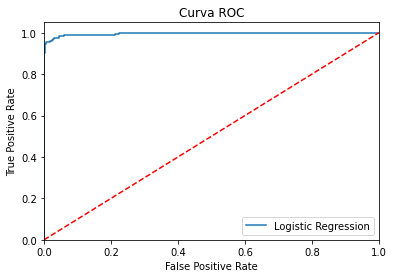

In [16]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

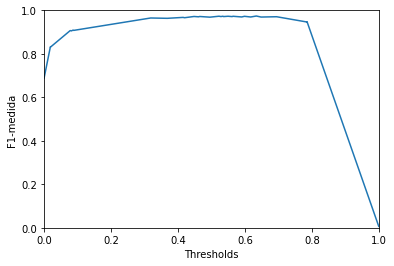

In [17]:
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Thresholds')
plt.ylabel('F1-medida')
plt.plot(thresholds,f1score,label='Falso Positivo')
plt.show()

In [18]:
bestf1 = f1score[f1score.argmax()]
besthresh = thresholds[f1score.argmax()]
print(besthresh)
print(bestf1)

0.633900904096778
0.9739663093415009


In [19]:
f1_score(ytest, ypred)

0.9701492537313433

In [20]:
0# melhor valor para threshold a partir da média geométrica
geo = np.sqrt(tpr * (1-fpr))
index_geo = np.argmax(geo)
print('Best Threshold = %f' % thresholds[index_geo])

Best Threshold = 0.633901


In [21]:
# predição com o valor ótimo encontrado para threshold
ypred = (logreg.predict_proba(Xtest)[:,1] >= besthresh).astype(int)

In [22]:
cmatrix1 = sk.confusion_matrix(ytest,ypred)
print(cmatrix1)

[[299   2]
 [ 15 318]]


Text(0.5, 1.0, 'Accuracy Score: 0.9732')

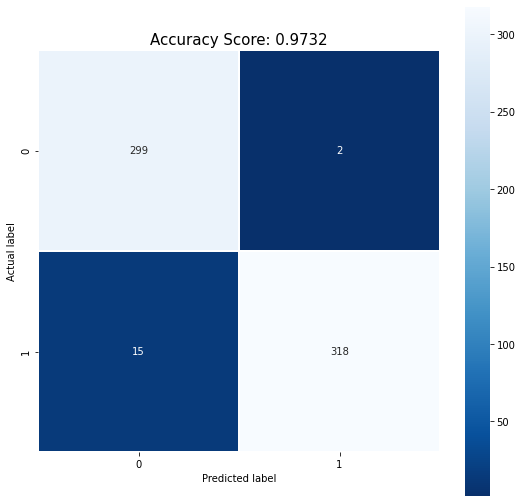

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cmatrix1, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.4f}'.format(accuracy_score(ytest,ypred))
plt.title(all_sample_title, size = 15)


# Parte 2 - Classificação multi-classe

Problema: identificação de atividade humana usando dados de smartphones

In [5]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
X_test = genfromtxt('X_test.txt')
X_train = genfromtxt('X_train.txt')
y_test = genfromtxt('y_test.txt')
y_train = genfromtxt('y_train.txt')

In [8]:
#561 colunas para os atributos e 2947 linhas de amostras
print(len(X_test[0]))
print(len(X_test[:,0]))

561
2947
